### USING PRETRAINED MODEL

Here we will just ımport the pretrained model from tensorflow and make a prediction with this model.

I will make this just for inceptionV3, but available for VGG and Resnet at comments

In [1]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import decode_predictions
from keras.applications.inception_v3 import preprocess_input

#Model for Resnet
#from tensorflow.keras.applications.resnet50 import ResNet50
#from tensorflow.keras.applications.resnet50 import decode_predictions
#from keras.applications.resnet50 import preprocess_input

#Model for VGG16
#from tensorflow.keras.applications import VGG16
#from keras.applications.vgg16 import preprocess_input
#from tensorflow.keras.applications.vgg16 import decode_predictions


from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os
from os import listdir
from PIL import Image as PImage

# For ResNet and VGG, img_width, img_height = 224, 224

img_width, img_height = 299, 299

#for ResNet, InceptionV3 will be replaced by ResNet50, for VGG, InceptionV3 will be replaced by VGG16

model_pretrained = InceptionV3(weights='imagenet', 
                      include_top=True, 
                      input_shape=(img_height, img_width, 3))

In [2]:
model_pretrained.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

In [4]:
len(model_pretrained.layers)

313

In [6]:
# Insert correct path of your image below
img_path =r'C:\Users\Zeki\Desktop\kisisel calismalar\github_notebooks\MasteringComputerVisionwithTF2\example_images\42078.jpg'
img = image.load_img(img_path, target_size=(img_width, img_height))
img_data = image.img_to_array(img)
img_data = np.expand_dims(img_data, axis=0)
img_data = preprocess_input(img_data)

In [7]:
img_data.shape

(1, 299, 299, 3)

In [8]:
cnn_feature = model_pretrained.predict(img_data,verbose=0)

In [9]:
cnn_feature

array([[6.24836903e-05, 7.12802575e-05, 1.01041434e-04, 1.26699902e-04,
        9.50734757e-05, 3.60736412e-05, 9.91845009e-05, 8.58550338e-05,
        2.59376629e-05, 9.21815081e-05, 1.11638066e-04, 1.62145632e-04,
        8.59004140e-05, 7.98139663e-05, 2.37636894e-04, 6.41433944e-05,
        6.27519912e-05, 4.07760635e-05, 9.29559028e-05, 7.24154597e-05,
        2.44125127e-04, 5.93043878e-05, 1.99950766e-04, 5.85015005e-05,
        1.78189424e-04, 7.11232715e-05, 7.82672359e-05, 3.94493691e-05,
        1.09839486e-04, 7.46291553e-05, 1.03888466e-04, 8.22139773e-05,
        4.70918567e-05, 7.49422543e-05, 7.68785394e-05, 4.50047555e-05,
        2.56931435e-05, 5.54556573e-05, 4.60466617e-05, 8.21948488e-05,
        1.74720029e-04, 1.74604342e-04, 7.51010812e-05, 1.92830747e-04,
        6.35105971e-05, 3.06484872e-05, 7.51330372e-05, 8.30595818e-05,
        6.83989711e-05, 1.77057445e-04, 6.95975104e-05, 8.16613610e-05,
        8.59895881e-05, 6.58741992e-05, 5.66566305e-05, 1.313168

In [11]:
cnn_feature.shape

(1, 1000)

Imagenet has been trained with 1000 classes... So we have 1000 different probability scores.. until that it is not readable for a person.. let's see what we have

In [12]:
label = decode_predictions(cnn_feature)

In [13]:
label

[[('n02114548', 'white_wolf', 0.5001132),
  ('n02114367', 'timber_wolf', 0.2797593),
  ('n02114855', 'coyote', 0.09676792),
  ('n02114712', 'red_wolf', 0.013807922),
  ('n02115641', 'dingo', 0.009434859)]]

In [14]:
# we need to take first one with a high prbability score
label = label[0][0]

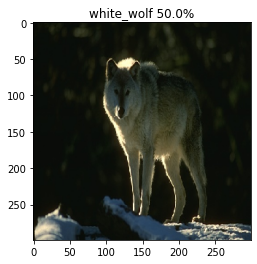

In [15]:
plt.imshow(img)

stringprint ="%.1f" % round(label[2]*100,1)
#plt.title(label[1] + str(""%.1f" label[2]*100))
plt.title(label[1] + " " + str(stringprint) + "%")
plt.show()

Try this on different images and show the result with a for loop

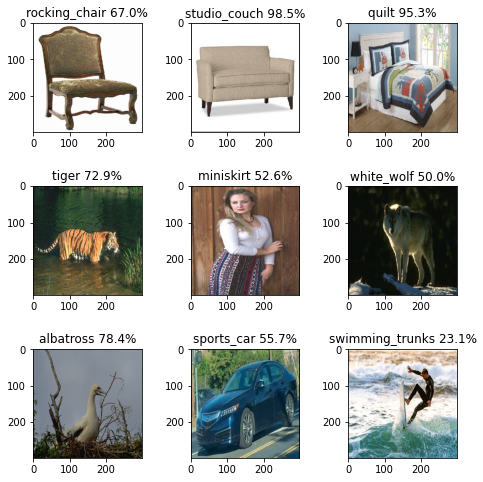

In [17]:
# Insert correct path of your image folder below

folder_path = 'example_images/'
images = os.listdir(folder_path)
fig = plt.figure(figsize=(8,8))
i=0
rows=3
columns=3

for image1 in images:
    i+=1
    im = image.load_img(folder_path+image1, target_size=(img_width, img_height))
    img_data = image.img_to_array(im)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)

    cnn_feature = model_pretrained.predict(img_data,verbose=0)
    label = decode_predictions(cnn_feature)
    label = label[0][0]
    
    fig.add_subplot(rows,columns,i)
    fig.subplots_adjust(hspace=.5)

    plt.imshow(im)
    stringprint ="%.1f" % round(label[2]*100,1)
    plt.title(label[1] + " " + str(stringprint) + "%")
plt.show()
        

## 2- TRANSFER LEARNING

In [ ]:
from tensorflow.keras.applications import InceptionV3
from keras.applications.inception_v3 import preprocess_input

#The below commented lines are for ResNet and VGG16
#from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

#from tensorflow.keras.applications import VGG16
#from keras.applications.vgg16 import preprocess_input

from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import SGD, Adam


# ResNet and VGG16, img_width, img_height = 224, 224
img_width, img_height = 299, 299


NUM_EPOCHS = 5
batchsize = 10
num_train_images = 900
num_val_images = 100

#for ResNet, InceptionV3 will be replaced by ResNet50, for VGG, InceptionV3 will be replaced by VGG16

base_model = InceptionV3(weights='imagenet', 
                      include_top=False, 
                      input_shape=(img_height, img_width, 3))

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_dir = 'furniture_images/train'


train_datagen =  ImageDataGenerator(
      preprocessing_function=preprocess_input,
      rotation_range=90,
      horizontal_flip=True,
      vertical_flip=True
    )

train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(img_height, img_width), 
                                                    batch_size=batchsize)

In [ ]:
val_dir = 'furniture_images/val'


val_datagen =  ImageDataGenerator(
      preprocessing_function=preprocess_input,
      rotation_range=90,
      horizontal_flip=True,
      vertical_flip=True
    )

val_generator = val_datagen.flow_from_directory(val_dir, 
                                                    target_size=(img_height, img_width), 
                                                    batch_size=batchsize)

In [ ]:
def build_final_model(base_model, dropout, fc_layers, num_classes):
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    
    
    x = GlobalAveragePooling2D()(x)
   
    x = Flatten()(x)
    
    
    for fc in fc_layers:
        # New FC layer, random init
        x = Dense(fc, activation='relu')(x) 
        x = Dropout(dropout)(x)

    # New softmax layer
    predictions = Dense(num_classes, activation='softmax')(x) 
    
    final_model = Model(inputs=base_model.input, outputs=predictions)

    return final_model

class_list = ["bed", "chair", "sofa"]
FC_LAYERS = [1024, 1024]
dropout = 0.3

final_model = build_final_model(base_model, 
                                      dropout=dropout, 
                                      fc_layers=FC_LAYERS, 
                                      num_classes=len(class_list))

### In this code, we used the base model to generate the feature vector by using only convolutional layers.

#### ADD CHECKPOINT FOR SAVING MODEL

In [ ]:
adam = Adam(lr=0.00001)
final_model.compile(adam, loss='categorical_crossentropy', metrics=['accuracy'])

history = final_model.fit_generator(train_generator, epochs=NUM_EPOCHS, workers=0, 
                                       steps_per_epoch=num_train_images // batchsize, 
                                       shuffle=True, validation_data=val_generator,
        validation_steps=num_val_images // batchsize)


In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,5.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
from keras.preprocessing import image
import numpy as np
# the below path shows the full path for uploaded image, adjust it for your specific path
img_path = 'furniture_images/train/bed/bed00000002train.jpg'
#img_path ='/home/krish/visual_search/furniture-detector/img/train/chair/00000009.jpg'
#img_path ='/home/krish/visual_search/furniture-detector/img/train/sofa/00000016.jpg'
img = image.load_img(img_path, target_size=(img_width, img_height))
img_data = image.img_to_array(img)
img_data = np.expand_dims(img_data, axis=0)
img_data1 = preprocess_input(img_data)

pretrained_feature = final_model.predict(img_data,verbose=0)
pretrained_feature_np = np.array(pretrained_feature)
pretrained_feature1D = pretrained_feature_np.flatten()

pretrained_feature_base = base_model.predict(img_data1)
pretrained_feature_np_base = np.array(pretrained_feature_base)
pretrained_feature1D_base = pretrained_feature_np_base.flatten()


print (pretrained_feature1D)
y_prob = final_model.predict(img_data)

y_classes = y_prob.argmax(axis=-1)

print(y_classes)



In [ ]:
import os
from scipy.spatial import distance as dist
from sklearn.metrics.pairwise import cosine_similarity

# Below shows the full path for test images, adjust it for your specific path
if y_classes == [0]:
    path = 'furniture_images/val/bed'
elif y_classes == [1]:
    path = 'furniture_images/val/chair'
else:
    path = 'furniture_images/val/sofa'
    
mindist=10000
maxcosine =0
i=0
for filename in os.listdir(path):
    image_train = os.path.join(path, filename)
    i +=1
    imgtrain = image.load_img(image_train, target_size=(img_width, img_height))
    img_data_train = image.img_to_array(imgtrain)
    img_data_train = np.expand_dims(img_data_train, axis=0)
    img_data_train = preprocess_input(img_data_train)

    pretrained_feature_train = base_model.predict(img_data_train)
    pretrained_feature_np_train = np.array(pretrained_feature_train)
    pretrained_feature_train1D = pretrained_feature_np_train.flatten()
    eucldist = dist.euclidean(pretrained_feature1D_base,pretrained_feature_train1D)
    
    if mindist > eucldist:
        mindist=eucldist
        minfilename = filename
    #print (vgg16_feature_np)
    
    dot_product = np.dot(pretrained_feature1D_base,pretrained_feature_train1D)#normalize the results, to achieve similarity measures independant #of the scale of the vectors
    norm_Y = np.linalg.norm(pretrained_feature1D_base)
    norm_X = np.linalg.norm(pretrained_feature_train1D)
    cosine_similarity = dot_product / (norm_X * norm_Y)
    
    if maxcosine < cosine_similarity:
        maxcosine=cosine_similarity
        cosfilename = filename
    
    
    print ("%s filename %f euclediandist %f cosine_similarity" %(filename,eucldist,cosine_similarity))
    print ("%s minfilename %f mineuclediandist %s cosfilename %f maxcosinesimilarity" %(minfilename,mindist, cosfilename, maxcosine))


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
image_result = os.path.join(path, minfilename)
imgresult = image.load_img(image_train, target_size=(224, 224))
plt.imshow(img)

In [ ]:
fig = plt.figure(figsize=(8,8))
fig.add_subplot(2,2,1)
image_result1 = os.path.join(path, minfilename)
imgresult1 = image.load_img(image_result1, target_size=(224, 224))
plt.imshow(imgresult1)
eucledian5d ="%.7f" % mindist
plt.title("Eucledian_Distance " + str(eucledian5d))

fig.add_subplot(2,2,2)
image_result2 = os.path.join(path, cosfilename)
imgresult2 = image.load_img(image_result2, target_size=(224, 224))
plt.imshow(imgresult2)
cosine5d ="%.7f" % maxcosine
plt.title("Cosine_Similarity " + str(cosine5d))